In [57]:
import glob
import librosa
import librosa.display
import IPython.display as ipd
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import History 
import time

In [4]:
cats=[librosa.load(file) for file in glob.glob("D:/cats_dogs/cat_*.wav")]
dogs=[librosa.load(file) for file in glob.glob("D:/cats_dogs/dog_barking_*.wav")]

In [5]:
numcats=np.array(cats).shape[0]
numdogs=np.array(dogs).shape[0]

<ipython-input-5-5773231d6cee>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  numcats=np.array(cats).shape[0]
<ipython-input-5-5773231d6cee>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  numdogs=np.array(dogs).shape[0]


In [6]:
cats=[np.mean(librosa.feature.mfcc(y=cats[i][0],sr=cats[i][1],n_mfcc=40).T,axis=0) for i in range(numcats)]
dogs=[np.mean(librosa.feature.mfcc(y=dogs[i][0],sr=dogs[i][1],n_mfcc=40).T,axis=0) for i in range(numdogs)]

In [7]:
final=cats+dogs

In [12]:
df=pd.DataFrame({'features':final
                 ,'labels':['cats' for i in range(numcats)]
                 +['dogs' for i in range(numdogs)]})

In [15]:
df.head()

,features,labels
0,"[-316.0102, 130.9508, -19.625652, 37.887035, -...",cats
1,"[-289.78433, 19.93292, -87.98626, 26.22178, -3...",cats
2,"[-194.15608, 96.25028, -44.438072, 41.626842, ...",cats
3,"[-260.6389, 90.66975, -41.66964, 0.67474085, -...",cats
4,"[-280.03094, 109.93842, -48.041943, 5.455309, ...",cats


In [16]:
X=np.array(df.features.tolist())
y=np.array(df.labels.tolist())

In [17]:
enc=LabelEncoder()
y=to_categorical(enc.fit_transform(y))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [27]:
layers=[2,3,4]
nodes=[16,32,64,128,256,512,1024]

In [35]:
paramslayers=[]
trainacclayers=[]
testacclayers=[]
timeslayers=[]
paramsnodes=[]
trainaccnodes=[]
testaccnodes=[]
timesnodes=[]

In [36]:
for i in range(len(layers)):
    t=time.time()
    model=Sequential()
    model.add(tf.keras.Input(shape=(40,)))
    for i in range(layers[i]):
        model.add(Dense(512,activation="relu"))
    model.add(Dense(2,activation="softmax"))
    paramslayers.append(model.count_params())
    model.compile(loss='categorical_crossentropy',metrics=['accuracy']
              ,optimizer='adam')
    model.fit(X_train, y_train, epochs=100,batch_size=64
              ,validation_data=(X_test,y_test))
    timeslayers.append(time.time()-t)
    trainacclayers.append(model.evaluate(X_train,y_train,verbose=0)[1])
    testacclayers.append(model.evaluate(X_test,y_test,verbose=0)[1])

Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 9.7107 - accuracy: 0.6516 - val_loss: 15.3648 - val_accuracy: 0.4821
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 8.1549 - accuracy: 0.6516 - val_loss: 9.7503 - val_accuracy: 0.6786
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 6.2959 - accuracy: 0.7828 - val_loss: 1.1260 - val_accuracy: 0.9107
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 3.2900 - accuracy: 0.7511 - val_loss: 1.3151 - val_accuracy: 0.8750
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 1.8133 - accuracy: 0.8733 - val_loss: 2.3364 - val_accuracy: 0.8393
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 2.1372 - accuracy: 0.8597 - val_loss: 0.6149 - val_accuracy: 0.9107
Epoch 7/100
4/4 [==============================] - 0s 9ms/step - loss: 1.3784 - accuracy: 0.8326 - val_loss: 0.4176 - val_accuracy: 0.9286
Epoch 8/100
4/4 [=======

4/4 [==============================] - 0s 12ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.5864 - val_accuracy: 0.9107
Epoch 60/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.5904 - val_accuracy: 0.9107
Epoch 61/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5854 - val_accuracy: 0.9107
Epoch 62/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.5893 - val_accuracy: 0.9107
Epoch 63/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.5960 - val_accuracy: 0.9107
Epoch 64/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.5946 - val_accuracy: 0.9107
Epoch 65/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.5960 - val_accuracy: 0.9107
Epoch 66/100
4/4 [==============

4/4 [==============================] - 0s 6ms/step - loss: 0.1378 - accuracy: 0.9367 - val_loss: 0.2045 - val_accuracy: 0.9643
Epoch 18/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1162 - accuracy: 0.9412 - val_loss: 0.2192 - val_accuracy: 0.9643
Epoch 19/100
4/4 [==============================] - 0s 9ms/step - loss: 0.1028 - accuracy: 0.9593 - val_loss: 0.2431 - val_accuracy: 0.9643
Epoch 20/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0915 - accuracy: 0.9638 - val_loss: 0.2628 - val_accuracy: 0.9643
Epoch 21/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0865 - accuracy: 0.9683 - val_loss: 0.2362 - val_accuracy: 0.9643
Epoch 22/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0814 - accuracy: 0.9683 - val_loss: 0.2383 - val_accuracy: 0.9464
Epoch 23/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0873 - accuracy: 0.9774 - val_loss: 0.3270 - val_accuracy: 0.8929
Epoch 24/100
4/4 [=============

4/4 [==============================] - 0s 8ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.4940 - val_accuracy: 0.9286
Epoch 76/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.4943 - val_accuracy: 0.9286
Epoch 77/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4922 - val_accuracy: 0.9286
Epoch 78/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.4973 - val_accuracy: 0.9286
Epoch 79/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5076 - val_accuracy: 0.9286
Epoch 80/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5107 - val_accuracy: 0.9107
Epoch 81/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5091 - val_accuracy: 0.9107
Epoch 82/100
4/4 [============

4/4 [==============================] - 0s 8ms/step - loss: 0.0759 - accuracy: 0.9774 - val_loss: 0.2412 - val_accuracy: 0.9464
Epoch 34/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0848 - accuracy: 0.9638 - val_loss: 0.2616 - val_accuracy: 0.9643
Epoch 35/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1021 - accuracy: 0.9593 - val_loss: 0.2359 - val_accuracy: 0.9286
Epoch 36/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0755 - accuracy: 0.9593 - val_loss: 0.2744 - val_accuracy: 0.9643
Epoch 37/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0596 - accuracy: 0.9819 - val_loss: 0.3200 - val_accuracy: 0.9464
Epoch 38/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0331 - accuracy: 0.9910 - val_loss: 0.3100 - val_accuracy: 0.9286
Epoch 39/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0584 - accuracy: 0.9774 - val_loss: 0.3199 - val_accuracy: 0.9464
Epoch 40/100
4/4 [==============

Epoch 91/100
4/4 [==============================] - 0s 9ms/step - loss: 2.0088e-04 - accuracy: 1.0000 - val_loss: 0.4876 - val_accuracy: 0.9286
Epoch 92/100
4/4 [==============================] - 0s 8ms/step - loss: 1.9084e-04 - accuracy: 1.0000 - val_loss: 0.4901 - val_accuracy: 0.9286
Epoch 93/100
4/4 [==============================] - 0s 8ms/step - loss: 1.8143e-04 - accuracy: 1.0000 - val_loss: 0.4924 - val_accuracy: 0.9286
Epoch 94/100
4/4 [==============================] - 0s 6ms/step - loss: 1.7388e-04 - accuracy: 1.0000 - val_loss: 0.4952 - val_accuracy: 0.9286
Epoch 95/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6541e-04 - accuracy: 1.0000 - val_loss: 0.4972 - val_accuracy: 0.9286
Epoch 96/100
4/4 [==============================] - 0s 8ms/step - loss: 1.5934e-04 - accuracy: 1.0000 - val_loss: 0.5000 - val_accuracy: 0.9286
Epoch 97/100
4/4 [==============================] - 0s 9ms/step - loss: 1.5074e-04 - accuracy: 1.0000 - val_loss: 0.5021 - val_accuracy:

In [42]:
for i in nodes:
    t=time.time()
    model=Sequential()
    model.add(tf.keras.Input(shape=(40,)))
    model.add(Dense(i,activation="relu"))
    model.add(Dense(2,activation="softmax"))
    paramsnodes.append(model.count_params())
    model.compile(loss='categorical_crossentropy',metrics=['accuracy']
              ,optimizer='adam')
    model.fit(X_train, y_train, epochs=100,batch_size=64
              ,validation_data=(X_test,y_test))
    timesnodes.append(time.time()-t)
    trainaccnodes.append(model.evaluate(X_train,y_train,verbose=0)[1])
    testaccnodes.append(model.evaluate(X_test,y_test,verbose=0)[1])

Epoch 1/100
4/4 [==============================] - 0s 46ms/step - loss: 78.1499 - accuracy: 0.4027 - val_loss: 71.8536 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 68.5539 - accuracy: 0.4027 - val_loss: 62.4345 - val_accuracy: 0.4286
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 59.7737 - accuracy: 0.4027 - val_loss: 52.9077 - val_accuracy: 0.4286
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 50.4784 - accuracy: 0.4072 - val_loss: 43.6534 - val_accuracy: 0.4464
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 41.3844 - accuracy: 0.4118 - val_loss: 34.5064 - val_accuracy: 0.4464
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 32.8723 - accuracy: 0.3982 - val_loss: 25.5552 - val_accuracy: 0.4286
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 24.7948 - accuracy: 0.3710 - val_loss: 18.1994 - val_accuracy: 0.3750
Epoch 8/1

4/4 [==============================] - 0s 8ms/step - loss: 0.7703 - accuracy: 0.8552 - val_loss: 1.4254 - val_accuracy: 0.8393
Epoch 60/100
4/4 [==============================] - 0s 9ms/step - loss: 0.7364 - accuracy: 0.8507 - val_loss: 1.3653 - val_accuracy: 0.8393
Epoch 61/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7166 - accuracy: 0.8507 - val_loss: 1.3178 - val_accuracy: 0.8571
Epoch 62/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6967 - accuracy: 0.8552 - val_loss: 1.2939 - val_accuracy: 0.8571
Epoch 63/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6667 - accuracy: 0.8552 - val_loss: 1.2590 - val_accuracy: 0.8571
Epoch 64/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6488 - accuracy: 0.8597 - val_loss: 1.2280 - val_accuracy: 0.8571
Epoch 65/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.8597 - val_loss: 1.1887 - val_accuracy: 0.8571
Epoch 66/100
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 2.0804 - accuracy: 0.8054 - val_loss: 1.4090 - val_accuracy: 0.7857
Epoch 18/100
4/4 [==============================] - 0s 4ms/step - loss: 1.8944 - accuracy: 0.7964 - val_loss: 1.2103 - val_accuracy: 0.8214
Epoch 19/100
4/4 [==============================] - 0s 8ms/step - loss: 1.7930 - accuracy: 0.8009 - val_loss: 1.0969 - val_accuracy: 0.8750
Epoch 20/100
4/4 [==============================] - 0s 8ms/step - loss: 1.6485 - accuracy: 0.8145 - val_loss: 1.0291 - val_accuracy: 0.8571
Epoch 21/100
4/4 [==============================] - 0s 8ms/step - loss: 1.5140 - accuracy: 0.8190 - val_loss: 1.0044 - val_accuracy: 0.8036
Epoch 22/100
4/4 [==============================] - 0s 8ms/step - loss: 1.3909 - accuracy: 0.8281 - val_loss: 0.9785 - val_accuracy: 0.8214
Epoch 23/100
4/4 [==============================] - 0s 9ms/step - loss: 1.2837 - accuracy: 0.8235 - val_loss: 0.9118 - val_accuracy: 0.8393
Epoch 24/100
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.2371 - accuracy: 0.9186 - val_loss: 0.4988 - val_accuracy: 0.9107
Epoch 76/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2381 - accuracy: 0.9140 - val_loss: 0.5023 - val_accuracy: 0.9107
Epoch 77/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2324 - accuracy: 0.9186 - val_loss: 0.4936 - val_accuracy: 0.9107
Epoch 78/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2362 - accuracy: 0.9186 - val_loss: 0.4723 - val_accuracy: 0.9107
Epoch 79/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.9186 - val_loss: 0.5056 - val_accuracy: 0.8929
Epoch 80/100
4/4 [==============================] - 0s 12ms/step - loss: 0.2197 - accuracy: 0.9140 - val_loss: 0.5201 - val_accuracy: 0.8929
Epoch 81/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2110 - accuracy: 0.9186 - val_loss: 0.4855 - val_accuracy: 0.9107
Epoch 82/100
4/4 [=============

4/4 [==============================] - 0s 12ms/step - loss: 0.2162 - accuracy: 0.9367 - val_loss: 0.4736 - val_accuracy: 0.9107
Epoch 34/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2121 - accuracy: 0.9367 - val_loss: 0.4693 - val_accuracy: 0.9107
Epoch 35/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2065 - accuracy: 0.9321 - val_loss: 0.4726 - val_accuracy: 0.9107
Epoch 36/100
4/4 [==============================] - 0s 9ms/step - loss: 0.2026 - accuracy: 0.9321 - val_loss: 0.4734 - val_accuracy: 0.9107
Epoch 37/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1979 - accuracy: 0.9321 - val_loss: 0.4747 - val_accuracy: 0.9107
Epoch 38/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1940 - accuracy: 0.9367 - val_loss: 0.4680 - val_accuracy: 0.9107
Epoch 39/100
4/4 [==============================] - 0s 8ms/step - loss: 0.1915 - accuracy: 0.9412 - val_loss: 0.4690 - val_accuracy: 0.9107
Epoch 40/100
4/4 [==============

4/4 [==============================] - 0s 8ms/step - loss: 0.0860 - accuracy: 0.9729 - val_loss: 0.4201 - val_accuracy: 0.8929
Epoch 92/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0848 - accuracy: 0.9729 - val_loss: 0.4205 - val_accuracy: 0.8929
Epoch 93/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.9683 - val_loss: 0.4116 - val_accuracy: 0.9107
Epoch 94/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0838 - accuracy: 0.9729 - val_loss: 0.4124 - val_accuracy: 0.9107
Epoch 95/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0850 - accuracy: 0.9683 - val_loss: 0.4186 - val_accuracy: 0.9107
Epoch 96/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0821 - accuracy: 0.9729 - val_loss: 0.4117 - val_accuracy: 0.9107
Epoch 97/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0832 - accuracy: 0.9729 - val_loss: 0.4052 - val_accuracy: 0.9107
Epoch 98/100
4/4 [===============

4/4 [==============================] - 0s 8ms/step - loss: 0.0457 - accuracy: 0.9910 - val_loss: 0.3518 - val_accuracy: 0.9464
Epoch 50/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0436 - accuracy: 0.9955 - val_loss: 0.3500 - val_accuracy: 0.9464
Epoch 51/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0385 - accuracy: 1.0000 - val_loss: 0.3551 - val_accuracy: 0.9464
Epoch 52/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0381 - accuracy: 0.9955 - val_loss: 0.3624 - val_accuracy: 0.9464
Epoch 53/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0380 - accuracy: 1.0000 - val_loss: 0.3726 - val_accuracy: 0.9464
Epoch 54/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0368 - accuracy: 0.9955 - val_loss: 0.3751 - val_accuracy: 0.9464
Epoch 55/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0369 - accuracy: 1.0000 - val_loss: 0.3796 - val_accuracy: 0.9464
Epoch 56/100
4/4 [===============

Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.6881 - accuracy: 0.8462 - val_loss: 0.6653 - val_accuracy: 0.9107
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7476 - accuracy: 0.8643 - val_loss: 0.5345 - val_accuracy: 0.9107
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5008 - accuracy: 0.8597 - val_loss: 0.5160 - val_accuracy: 0.8750
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5199 - accuracy: 0.8462 - val_loss: 0.3836 - val_accuracy: 0.9464
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3145 - accuracy: 0.8914 - val_loss: 0.3849 - val_accuracy: 0.9464
Epoch 11/100
4/4 [==============================] - 0s 8ms/step - loss: 0.3151 - accuracy: 0.8914 - val_loss: 0.3930 - val_accuracy: 0.9107
Epoch 12/100
4/4 [==============================] - 0s 8ms/step - loss: 0.2474 - accuracy: 0.9095 - val_loss: 0.3731 - val_accuracy: 0.9286
Epoch 13/100
4/4 [======

4/4 [==============================] - 0s 4ms/step - loss: 0.0368 - accuracy: 0.9864 - val_loss: 0.4690 - val_accuracy: 0.9286
Epoch 65/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0256 - accuracy: 1.0000 - val_loss: 0.5660 - val_accuracy: 0.8571
Epoch 66/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0264 - accuracy: 0.9955 - val_loss: 0.4961 - val_accuracy: 0.9107
Epoch 67/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0322 - accuracy: 0.9955 - val_loss: 0.4794 - val_accuracy: 0.9107
Epoch 68/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0220 - accuracy: 0.9955 - val_loss: 0.5708 - val_accuracy: 0.8571
Epoch 69/100
4/4 [==============================] - 0s 5ms/step - loss: 0.0217 - accuracy: 1.0000 - val_loss: 0.5069 - val_accuracy: 0.9107
Epoch 70/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0240 - accuracy: 0.9910 - val_loss: 0.5166 - val_accuracy: 0.9107
Epoch 71/100
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.0767 - accuracy: 0.9774 - val_loss: 0.4406 - val_accuracy: 0.9107
Epoch 23/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0705 - accuracy: 0.9819 - val_loss: 0.4535 - val_accuracy: 0.8929
Epoch 24/100
4/4 [==============================] - 0s 4ms/step - loss: 0.0662 - accuracy: 0.9819 - val_loss: 0.4561 - val_accuracy: 0.8929
Epoch 25/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0595 - accuracy: 0.9910 - val_loss: 0.4373 - val_accuracy: 0.8929
Epoch 26/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0611 - accuracy: 0.9910 - val_loss: 0.4355 - val_accuracy: 0.8750
Epoch 27/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0640 - accuracy: 0.9819 - val_loss: 0.4340 - val_accuracy: 0.8929
Epoch 28/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9864 - val_loss: 0.5021 - val_accuracy: 0.8571
Epoch 29/100
4/4 [===============

4/4 [==============================] - 0s 4ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.6538 - val_accuracy: 0.8571
Epoch 81/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.6360 - val_accuracy: 0.8571
Epoch 82/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6449 - val_accuracy: 0.8571
Epoch 83/100
4/4 [==============================] - 0s 6ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.6550 - val_accuracy: 0.8571
Epoch 84/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.6593 - val_accuracy: 0.8571
Epoch 85/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.6561 - val_accuracy: 0.8571
Epoch 86/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.6610 - val_accuracy: 0.8571
Epoch 87/100
4/4 [===============

4/4 [==============================] - 0s 9ms/step - loss: 0.0175 - accuracy: 1.0000 - val_loss: 0.5290 - val_accuracy: 0.8929
Epoch 39/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0186 - accuracy: 0.9955 - val_loss: 0.5595 - val_accuracy: 0.8929
Epoch 40/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0184 - accuracy: 1.0000 - val_loss: 0.5700 - val_accuracy: 0.8929
Epoch 41/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0162 - accuracy: 0.9955 - val_loss: 0.5613 - val_accuracy: 0.8929
Epoch 42/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0158 - accuracy: 1.0000 - val_loss: 0.5832 - val_accuracy: 0.8929
Epoch 43/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0138 - accuracy: 1.0000 - val_loss: 0.5739 - val_accuracy: 0.8929
Epoch 44/100
4/4 [==============================] - 0s 12ms/step - loss: 0.0147 - accuracy: 1.0000 - val_loss: 0.5844 - val_accuracy: 0.8929
Epoch 45/100
4/4 [=============

4/4 [==============================] - 0s 12ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.7061 - val_accuracy: 0.8929
Epoch 97/100
4/4 [==============================] - 0s 13ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.7110 - val_accuracy: 0.8929
Epoch 98/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.7107 - val_accuracy: 0.8929
Epoch 99/100
4/4 [==============================] - 0s 8ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7163 - val_accuracy: 0.8929
Epoch 100/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.7119 - val_accuracy: 0.8750


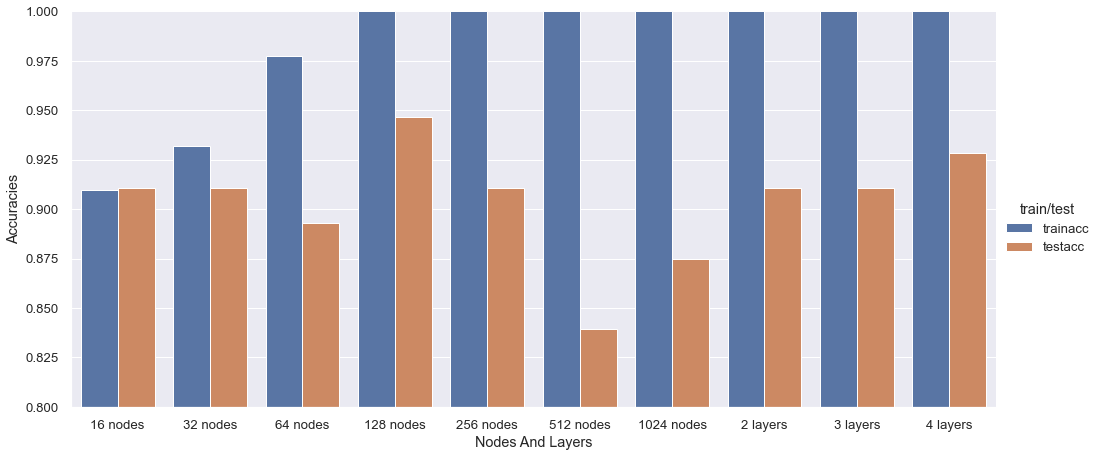

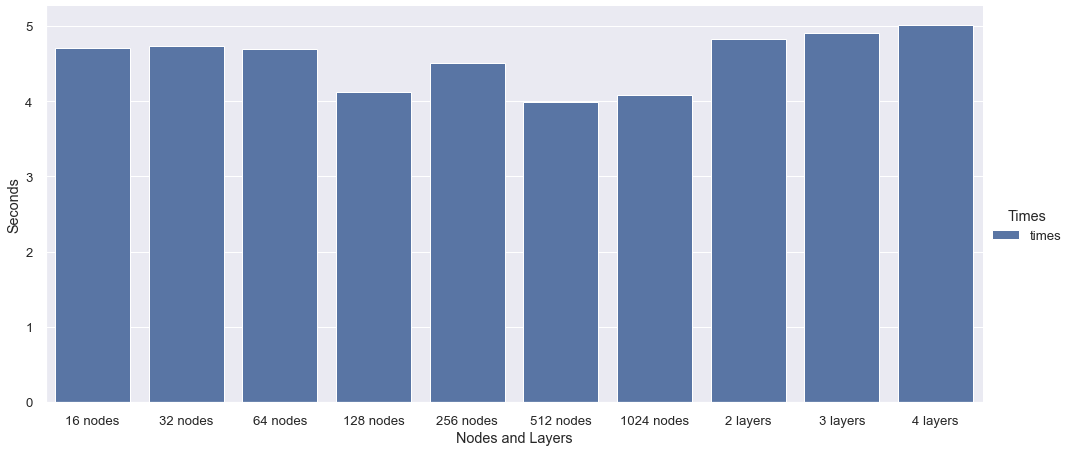

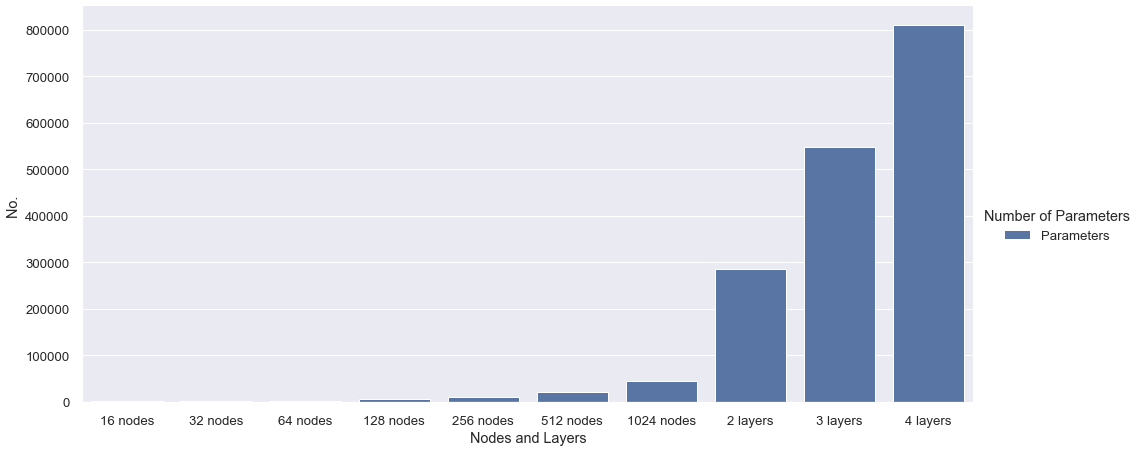

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
layers=[str(i) for i in layers]
nodes=[str(i) for i in nodes]
sns.set(font_scale=1.2)
data={'Nodes And Layers':[str(i)+" nodes" for i in nodes]+[str(i)+" layers" for i in layers]
      ,'trainacc':trainaccnodes+trainacclayers
      ,'testacc':testaccnodes+testacclayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Nodes And Layers", var_name="train/test", value_name="Accuracies")
nls=sns.catplot(x='Nodes And Layers', y='Accuracies', hue='train/test', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
nls.set(ylim=(0.8,1))
data={'Nodes and Layers':[str(i)+" nodes" for i in nodes]+[str(i)+" layers" for i in layers]
      ,'times':timesnodes+timeslayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Nodes and Layers", var_name="Times", value_name="Seconds")
sns.catplot(x='Nodes and Layers', y='Seconds', hue='Times', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)
data={'Nodes and Layers':[str(i)+" nodes" for i in nodes]+[str(i)+" layers" for i in layers]
      ,'Parameters':paramsnodes+paramslayers}
df=pd.DataFrame(data)
df = pd.melt(df, id_vars="Nodes and Layers", var_name="Number of Parameters", value_name="No. ")
sns.catplot(x='Nodes and Layers', y='No. ', hue='Number of Parameters', 
            data=df, kind='bar',height=6.27, aspect=13.7/6.27)

# Personal NN

In [61]:
model=Sequential()
model.add(tf.keras.Input(shape=(40,)))
for i in range(4):
    model.add(Dense(2048,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
history=History()
model.fit(X_train, y_train, epochs=100,batch_size=64,validation_data=(X_test,y_test),callbacks=[history])
print('Training Accuracy -',model.evaluate(X_train,y_train,verbose=0)[1])
print('Testing Accuracy -',model.evaluate(X_test,y_test,verbose=0)[1])

Epoch 1/100
4/4 [==============================] - 0s 54ms/step - loss: 53.0749 - accuracy: 0.5294 - val_loss: 27.5757 - val_accuracy: 0.4286
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 14.0831 - accuracy: 0.4977 - val_loss: 4.0344 - val_accuracy: 0.5714
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 1.7588 - accuracy: 0.6290 - val_loss: 0.9561 - val_accuracy: 0.7679
Epoch 4/100
4/4 [==============================] - 0s 13ms/step - loss: 0.8482 - accuracy: 0.7240 - val_loss: 0.4480 - val_accuracy: 0.8214
Epoch 5/100
4/4 [==============================] - 0s 16ms/step - loss: 0.5183 - accuracy: 0.8281 - val_loss: 0.2714 - val_accuracy: 0.8929
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3251 - accuracy: 0.8507 - val_loss: 0.1943 - val_accuracy: 0.9464
Epoch 7/100
4/4 [==============================] - 0s 13ms/step - loss: 0.2877 - accuracy: 0.8869 - val_loss: 0.2009 - val_accuracy: 0.9464
Epoch 8/100
4/4 [

Epoch 59/100
4/4 [==============================] - 0s 13ms/step - loss: 2.7044e-06 - accuracy: 1.0000 - val_loss: 0.9843 - val_accuracy: 0.9464
Epoch 60/100
4/4 [==============================] - 0s 16ms/step - loss: 2.5868e-06 - accuracy: 1.0000 - val_loss: 0.9911 - val_accuracy: 0.9464
Epoch 61/100
4/4 [==============================] - 0s 15ms/step - loss: 2.0437e-06 - accuracy: 1.0000 - val_loss: 0.9997 - val_accuracy: 0.9464
Epoch 62/100
4/4 [==============================] - 0s 14ms/step - loss: 1.8722e-06 - accuracy: 1.0000 - val_loss: 1.0074 - val_accuracy: 0.9464
Epoch 63/100
4/4 [==============================] - 0s 12ms/step - loss: 2.0470e-06 - accuracy: 1.0000 - val_loss: 1.0110 - val_accuracy: 0.9464
Epoch 64/100
4/4 [==============================] - 0s 9ms/step - loss: 1.6813e-06 - accuracy: 1.0000 - val_loss: 1.0107 - val_accuracy: 0.9464
Epoch 65/100
4/4 [==============================] - 0s 17ms/step - loss: 1.3706e-06 - accuracy: 1.0000 - val_loss: 1.0109 - val_acc

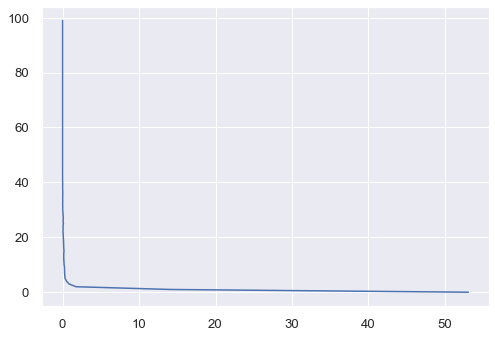

In [65]:
plt.plot(history.history['loss'],[i for i in range(100)])